Data: Cleaned BRFSS 2015 (Behavioral Risk Factor Surveillance System) + balanced dataset
Gathered from Kaagle.

# Informations about the dataset

Diabetes_binary : you have diabetes (0,1)

HighBP : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

CholCheck : Cholesterol check within past five years (0,1)

BMI : Body Mass Index (BMI)

Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

Stroke : (Ever told) you had a stroke. (0,1)

HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

Fruits : Consume Fruit 1 or more times per day (0,1)

Veggies : Consume Vegetables 1 or more times per day (0,1)

HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

GenHlth : Would you say that in general your health is: rate (1 ~ 5)

MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)

Sex : Indicate sex of respondent (0,1) (Female or Male)

Age : Fourteen-level age category (1 ~ 14)

Education : What is the highest grade or year of school you completed? (1 ~ 6)

Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Data Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [4]:
df.sample(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
47219,1.0,1.0,1.0,1.0,25.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,4.0,30.0,10.0,0.0,1.0,13.0,5.0,5.0
67982,1.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,6.0,5.0,8.0
35654,1.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,6.0
18184,0.0,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,30.0,0.0,1.0,10.0,6.0,8.0
13399,0.0,1.0,1.0,1.0,43.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,4.0,3.0
6972,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
28002,0.0,0.0,1.0,1.0,33.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,7.0,0.0,0.0,0.0,8.0,5.0,4.0
54563,1.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,6.0
57356,1.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
37629,1.0,0.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,20.0,0.0,0.0,0.0,12.0,5.0,3.0


In [5]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


In [7]:
for i in df :
        print(df[i].value_counts())
        print("_____________________________________________________________________________")

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
1.0    39832
0.0    30860
Name: HighBP, dtype: int64
_____________________________________________________________________________
1.0    37163
0.0    33529
Name: HighChol, dtype: int64
_____________________________________________________________________________
1.0    68943
0.0     1749
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: BMI, Length: 80, dtype: int64
_____________________________________________________________________________
0.0    37094
1.0    33598
Name: Smoker, dtype: int64
_____________________________________________________________________________
0.0    66297
1.0     4395
Name: Stroke, dtype: int64
_____________________

In [8]:
df.duplicated().sum()

1635

In [9]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

df.shape

0


(69057, 22)

In [10]:
df2 = df.copy()

df2.Age[df2['Age'] == 1] = '18 to 24'
df2.Age[df2['Age'] == 2] = '25 to 29'
df2.Age[df2['Age'] == 3] = '30 to 34'
df2.Age[df2['Age'] == 4] = '35 to 39'
df2.Age[df2['Age'] == 5] = '40 to 44'
df2.Age[df2['Age'] == 6] = '45 to 49'
df2.Age[df2['Age'] == 7] = '50 to 54'
df2.Age[df2['Age'] == 8] = '55 to 59'
df2.Age[df2['Age'] == 9] = '60 to 64'
df2.Age[df2['Age'] == 10] = '65 to 69'
df2.Age[df2['Age'] == 11] = '70 to 74'
df2.Age[df2['Age'] == 12] = '75 to 79'
df2.Age[df2['Age'] == 13] = '80 or older'

df2.Diabetes_binary[df2['Diabetes_binary'] == 0] = 'No Diabetes'
df2.Diabetes_binary[df2['Diabetes_binary'] == 1] = 'Diabetes'

df2.HighBP[df2['HighBP'] == 0] = 'No High'
df2.HighBP[df2['HighBP'] == 1] = 'High BP'

df2.HighChol[df2['HighChol'] == 0] = 'No High Cholesterol'
df2.HighChol[df2['HighChol'] == 1] = 'High Cholesterol'

df2.CholCheck[df2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df2.CholCheck[df2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df2.Smoker[df2['Smoker'] == 0] = 'No'
df2.Smoker[df2['Smoker'] == 1] = 'Yes'

df2.Stroke[df2['Stroke'] == 0] = 'No'
df2.Stroke[df2['Stroke'] == 1] = 'Yes'

df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 0] = 'No'
df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 1] = 'Yes'

df2.PhysActivity[df2['PhysActivity'] == 0] = 'No'
df2.PhysActivity[df2['PhysActivity'] == 1] = 'Yes'

df2.Fruits[df2['Fruits'] == 0] = 'No'
df2.Fruits[df2['Fruits'] == 1] = 'Yes'

df2.Veggies[df2['Veggies'] == 0] = 'No'
df2.Veggies[df2['Veggies'] == 1] = 'Yes'

df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 0] = 'No'
df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 1] = 'Yes'

df2.AnyHealthcare[df2['AnyHealthcare'] == 0] = 'No'
df2.AnyHealthcare[df2['AnyHealthcare'] == 1] = 'Yes'

df2.NoDocbcCost[df2['NoDocbcCost'] == 0] = 'No'
df2.NoDocbcCost[df2['NoDocbcCost'] == 1] = 'Yes'

df2.GenHlth[df2['GenHlth'] == 5] = 'Poor'
df2.GenHlth[df2['GenHlth'] == 4] = 'Fair'
df2.GenHlth[df2['GenHlth'] == 3] = 'Good'
df2.GenHlth[df2['GenHlth'] == 2] = 'Very Good'
df2.GenHlth[df2['GenHlth'] == 1] = 'Excellent'



df2.DiffWalk[df2['DiffWalk'] == 0] = 'No'
df2.DiffWalk[df2['DiffWalk'] == 1] = 'Yes'

df2.Sex[df2['Sex'] == 0] = 'Female'
df2.Sex[df2['Sex'] == 1] = 'Male'

df2.Education[df2['Education'] == 1] = 'Never Attended School'
df2.Education[df2['Education'] == 2] = 'Elementary'
df2.Education[df2['Education'] == 3] = 'Junior High School'
df2.Education[df2['Education'] == 4] = 'Senior High School'
df2.Education[df2['Education'] == 5] = 'Undergraduate Degree'
df2.Education[df2['Education'] == 6] = 'Magister'

df2.Income[df2['Income'] == 1] = 'Less Than $10,000'
df2.Income[df2['Income'] == 2] = 'Less Than $10,000'
df2.Income[df2['Income'] == 3] = 'Less Than $10,000'
df2.Income[df2['Income'] == 4] = 'Less Than $10,000'
df2.Income[df2['Income'] == 5] = 'Less Than $35,000'
df2.Income[df2['Income'] == 6] = 'Less Than $35,000'
df2.Income[df2['Income'] == 7] = 'Less Than $35,000'
df2.Income[df2['Income'] == 8] = '$75,000 or More'

df2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,26.0,No,No,No,Yes,No,...,Yes,No,Good,5.0,30.0,No,Male,35 to 39,Magister,"$75,000 or More"
1,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,26.0,Yes,Yes,No,No,Yes,...,Yes,No,Good,0.0,0.0,No,Male,75 to 79,Magister,"$75,000 or More"
2,No Diabetes,No High,No High Cholesterol,Cholesterol Check in 5 Years,26.0,No,No,No,Yes,Yes,...,Yes,No,Excellent,0.0,10.0,No,Male,80 or older,Magister,"$75,000 or More"
3,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28.0,Yes,No,No,Yes,Yes,...,Yes,No,Good,0.0,3.0,No,Male,70 to 74,Magister,"$75,000 or More"
4,No Diabetes,No High,No High Cholesterol,Cholesterol Check in 5 Years,29.0,Yes,No,No,Yes,Yes,...,Yes,No,Very Good,0.0,0.0,No,Female,55 to 59,Undergraduate Degree,"$75,000 or More"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,Diabetes,No High,High Cholesterol,Cholesterol Check in 5 Years,37.0,No,No,No,No,No,...,Yes,No,Fair,0.0,0.0,No,Female,45 to 49,Senior High School,"Less Than $10,000"
70688,Diabetes,No High,High Cholesterol,Cholesterol Check in 5 Years,29.0,Yes,No,Yes,No,Yes,...,Yes,No,Very Good,0.0,0.0,Yes,Male,65 to 69,Junior High School,"Less Than $35,000"
70689,Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,25.0,No,No,Yes,No,Yes,...,Yes,No,Poor,15.0,0.0,Yes,Female,80 or older,Magister,"Less Than $10,000"
70690,Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,18.0,No,No,No,No,No,...,Yes,No,Fair,0.0,0.0,Yes,Female,70 to 74,Elementary,"Less Than $10,000"


<AxesSubplot: >

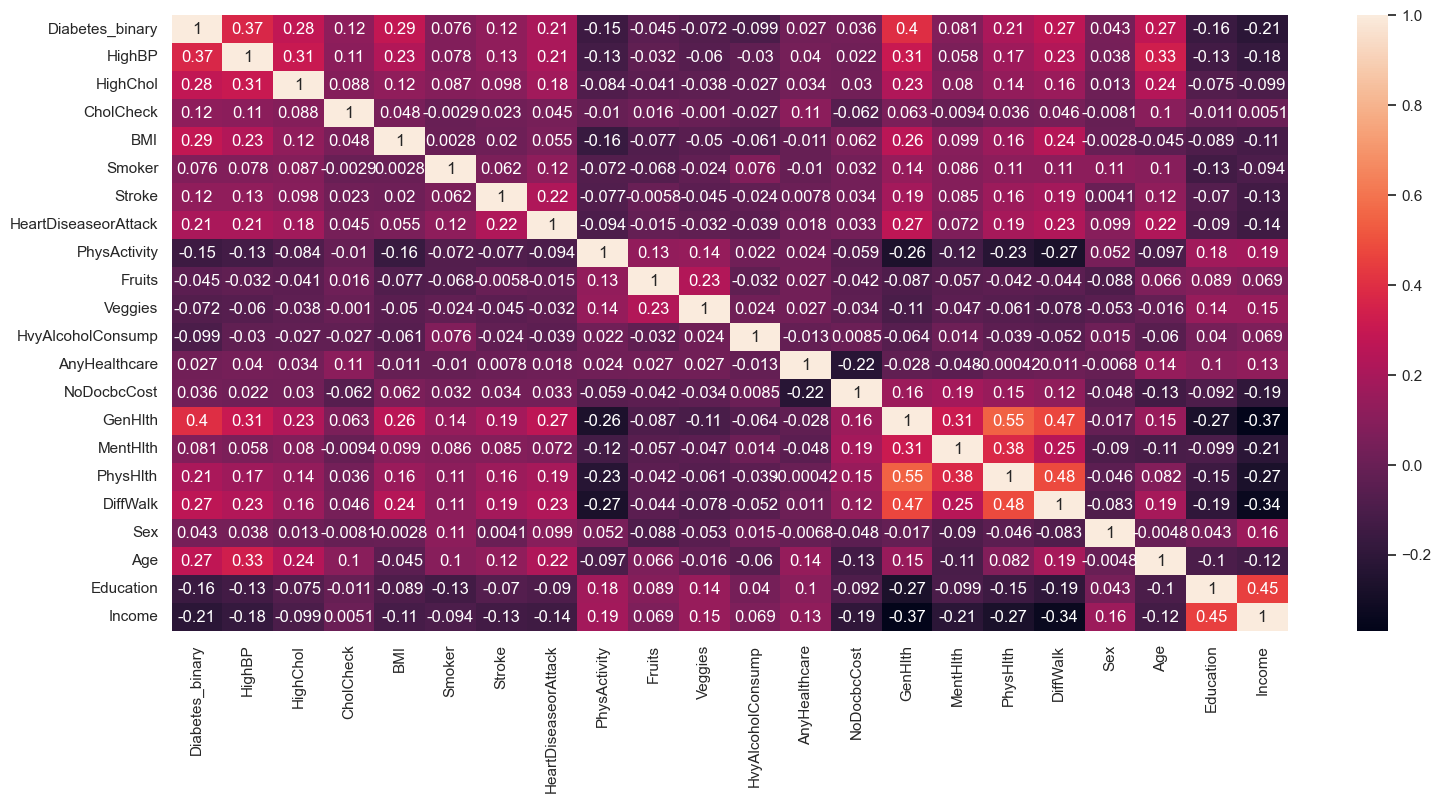

In [79]:
plt.figure(figsize=(18,8))


#Pearson's Correlation, -1 ≤ r ≤ 1
sns.heatmap(df.corr(), annot=True)

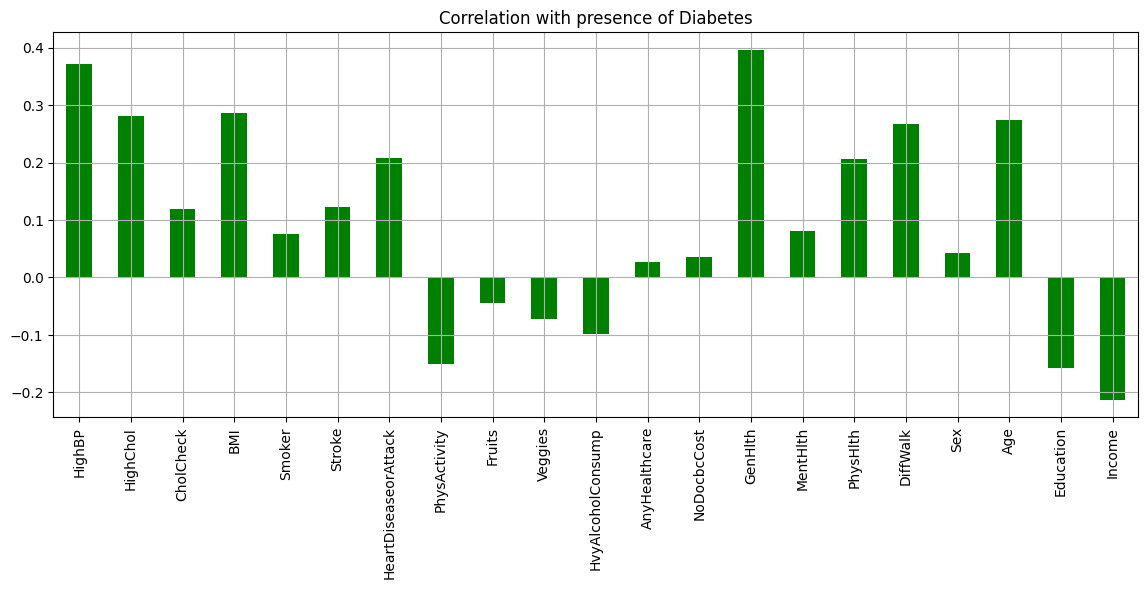

In [12]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary, method='pearson').plot(kind='bar', grid=True, figsize=(14, 5)
, title="Correlation with presence of Diabetes",color="Green");

In [13]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary, method='pearson').sort_values(ascending=False)

GenHlth                 0.396571
HighBP                  0.372048
BMI                     0.285643
HighChol                0.281399
Age                     0.274550
DiffWalk                0.267082
HeartDiseaseorAttack    0.207229
PhysHlth                0.206868
Stroke                  0.122727
CholCheck               0.118900
MentHlth                0.080688
Smoker                  0.075853
Sex                     0.042538
NoDocbcCost             0.036145
AnyHealthcare           0.027034
Fruits                 -0.044560
Veggies                -0.072181
HvyAlcoholConsump      -0.098709
PhysActivity           -0.150281
Education              -0.158522
Income                 -0.212846
dtype: float64

1. AnyHealthCare, NoDocbcCost, Sex and Fruits are the variable less correlated to presence of DM(Diabetes Mellitus). So, the presence of any HealthCare plan; any necessity of seeing a doctor, but no money to do so; any sex and any people that ingest at least 1 fruit per day don't have the ability to infer the presence or absence of diabetes.

2. GenHlth, HighBP, BMI and HighChol are the variable more correlated to the presence of diabetes. That means, people with poorly GeneralHealth, High Blood Pressure, High Body Mass Index and High Choleterol are more likely to have diabetes.

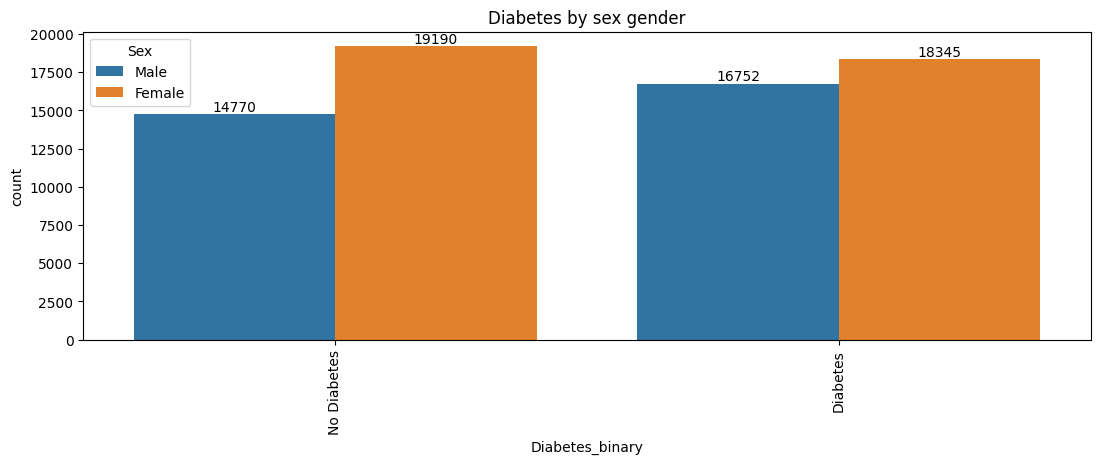

In [14]:
plt.figure(figsize=(13,4))
plot = sns.countplot(data=df2, x='Diabetes_binary', hue='Sex')
plt.xticks(rotation=90)
plt.title('Diabetes by sex gender')

#Show values on top
for container in plot.containers:
    plot.bar_label(container)



1. Sex gender may does not interfere in presence of diabetes

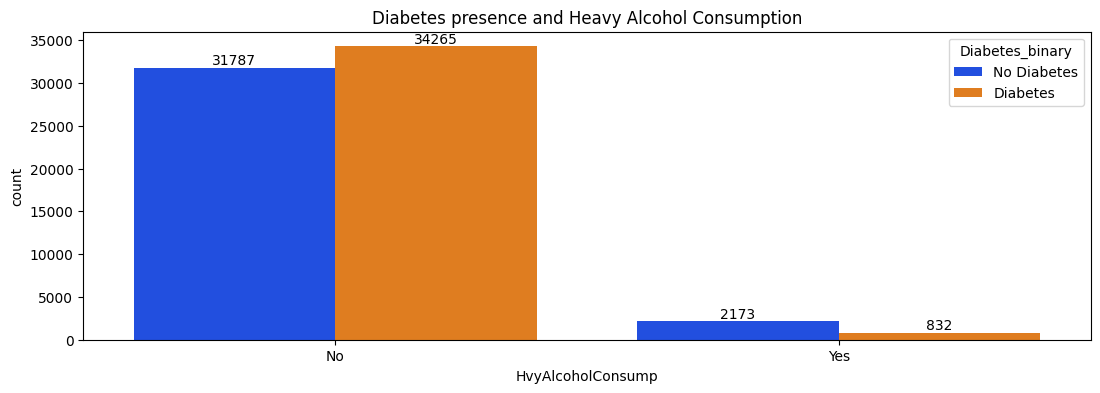

In [15]:
plt.figure(figsize=(13,4))

plot = sns.countplot(data=df2, x='HvyAlcoholConsump', hue='Diabetes_binary',palette='bright')
plt.title('Diabetes presence and Heavy Alcohol Consumption')
for container in plot.containers:
    plot.bar_label(container)

1. Heavy Alcohol Consumption seems to not interfere in the presence of diabetes

Text(0.5, 1.0, 'Relation between Smoker, HvyAlcoholConsump and Diabetes')

<Figure size 1200x500 with 0 Axes>

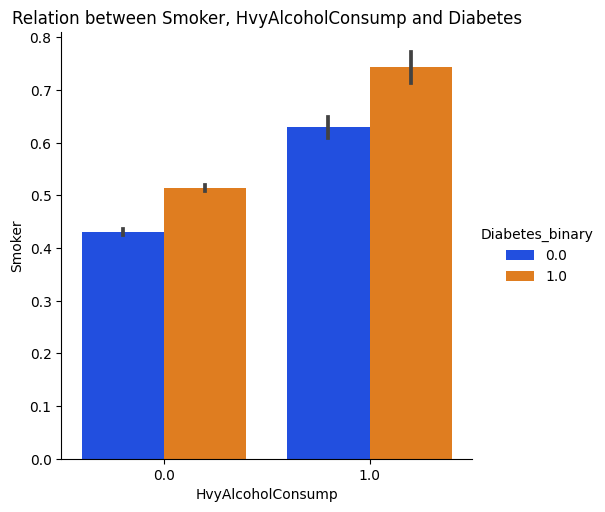

In [16]:
plt.figure(figsize=(12,5))

plot = sns.catplot(data=df, x='HvyAlcoholConsump', y='Smoker', hue='Diabetes_binary', kind='bar',palette='bright')
plt.title('Relation between Smoker, HvyAlcoholConsump and Diabetes')


1. Heavy Alcohol Consumption and Smoking habit seem to increase the presence of diabetes

<Figure size 1500x300 with 0 Axes>

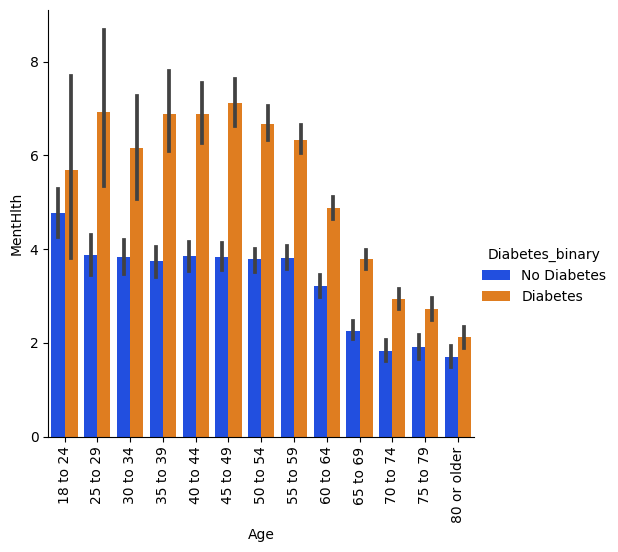

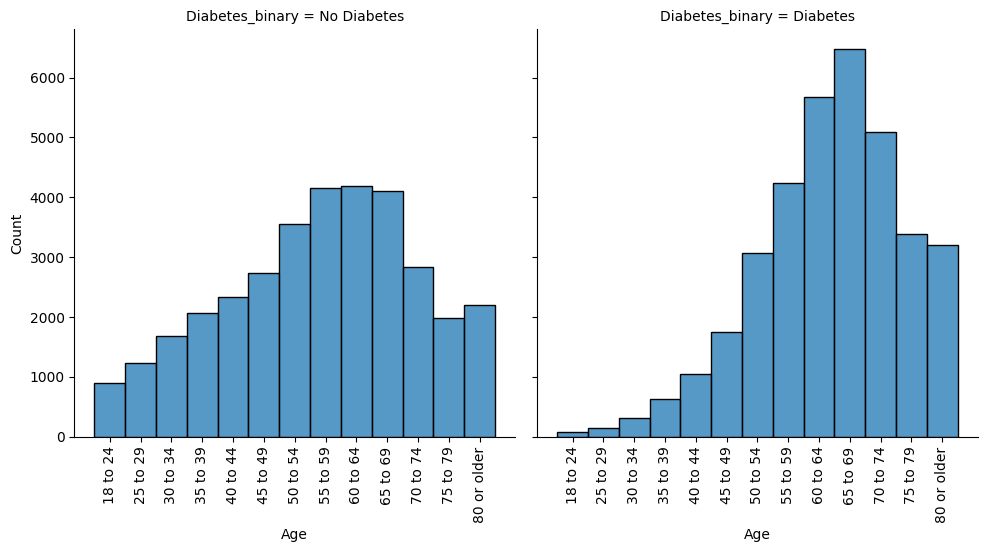

In [17]:
plt.figure(figsize=(15,3))

df3=df2.sort_values('Age')

sns.catplot(data=df3, x='Age', y='MentHlth', hue='Diabetes_binary', palette='bright', kind='bar')
plt.xticks(rotation=90)

sns.displot(data=df3, col='Diabetes_binary',x='Age', palette='bright').set_xticklabels(rotation=90)
plt.show()

1. People with many days of poor mental health (0-30) have a greater presence of diabetes than people with fewer days of poor mental health.
2. The older the people are, it seemed the better the Mental Health gets.
3. People with age between 60-74 years are more likely to have diabetes

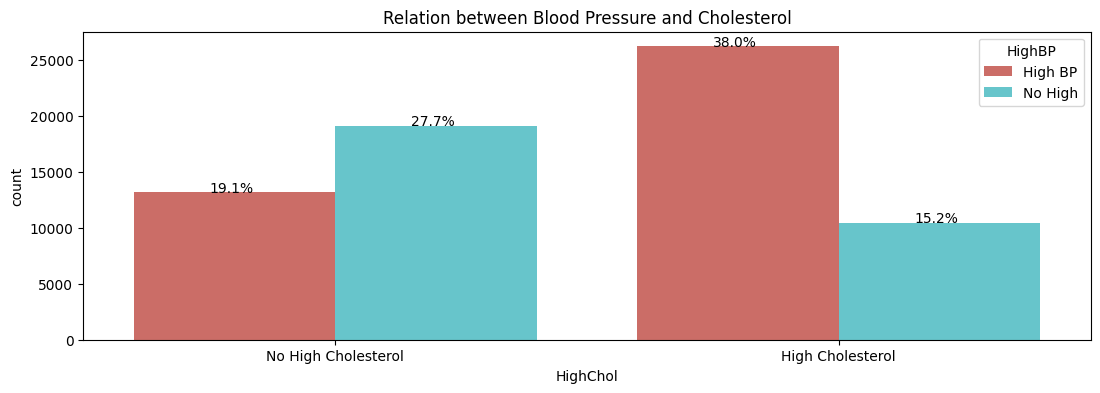

In [18]:
plt.figure(figsize=(13,4))

plot = sns.countplot(data=df2, x='HighChol', hue='HighBP',palette='hls')
plt.title('Relation between Blood Pressure and Cholesterol')
for i in plot.patches:
    plot.annotate('{:.1f}'.format(i.get_height()/df2.shape[0]*100)+'%',(i.get_x()+0.15, i.get_height()))
    
plt.show()

1. People with High Blood Pressure tend to have High Cholesterol and Vice Versa. People with No High Cholesterol tend to not have High Blood Presure

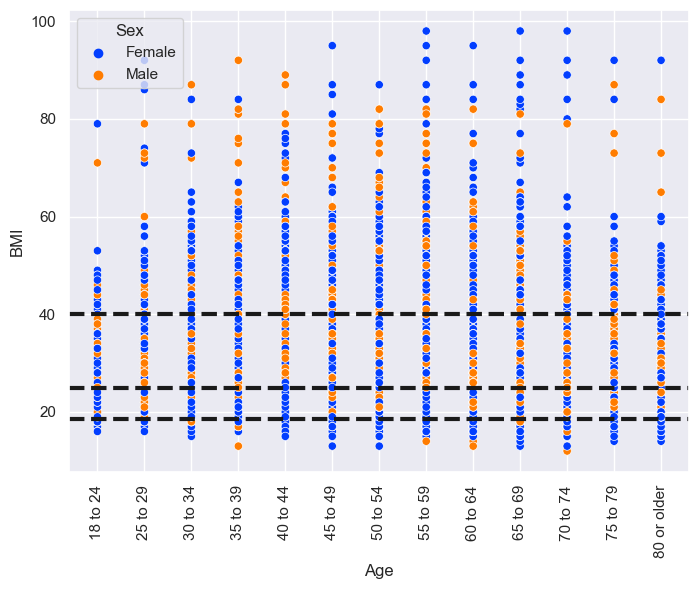

In [19]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))

##df3 is df with Age in crescent order

fig = sns.scatterplot(data=df3, x="Age", y="BMI", hue='Sex', palette='bright')

fig.axhline(y= 18.5, linewidth=3, color='k', linestyle= '--')
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
fig.axhline(y= 40, linewidth=3, color='k', linestyle= '--')



plt.xticks(rotation=90)
plt.show()


1. Many people interviewed are above BMI = 25, so the BMI is above the recommended for healthy weight

<Figure size 1500x500 with 0 Axes>

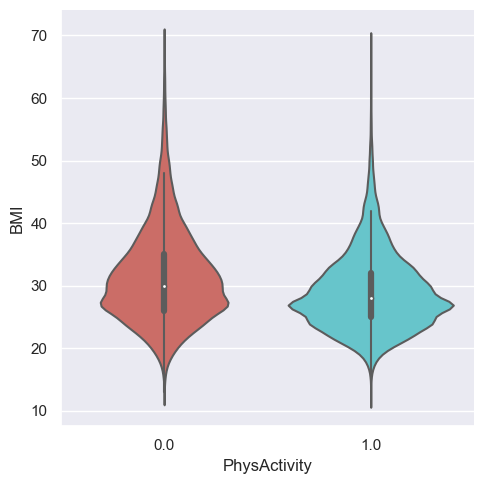

<Figure size 1500x500 with 0 Axes>

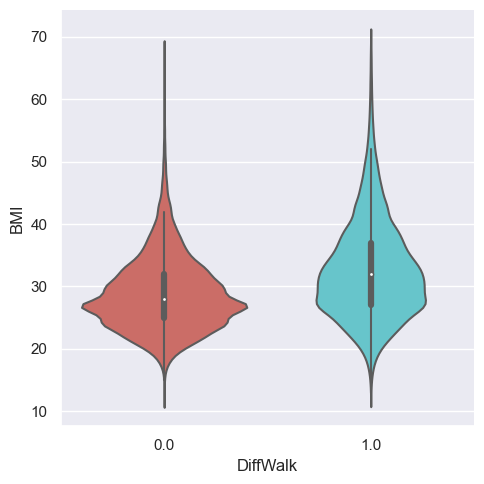

In [20]:
plt.figure(figsize = (15,5))
x=sns.catplot(data= df[df['BMI']<70],x="PhysActivity", y="BMI", kind="violin",palette='hls')
plt.show()
            
plt.figure(figsize = (15,5))
x=sns.catplot(data= df[df['BMI']<70],x="DiffWalk", y="BMI", kind="violin",palette='hls')
plt.show()

<Figure size 1500x500 with 0 Axes>

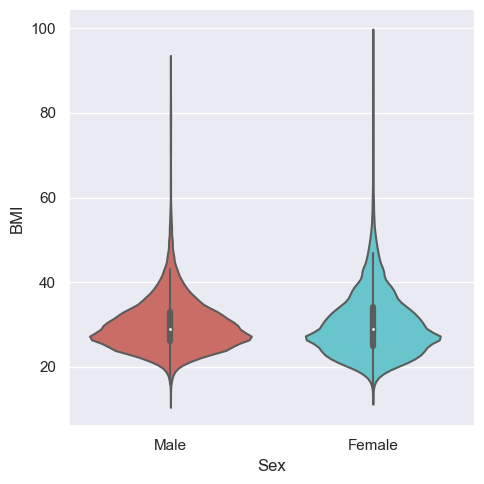

In [21]:
plt.figure(figsize = (15,5))
x=sns.catplot(data= df2,x="Sex", y="BMI", kind="violin",palette='hls')
plt.show()

1. People who do any physical activity have lower BMI levels,meanwhile people who don't do any physical activity tend to have higher levels of BMI.

2. People who have any difficulty walking tend to have highers BMI levels, meanwhile people who don't have any difficulty on walking tend to have lower lower levels of BMI.

<AxesSubplot: xlabel='PhysActivity', ylabel='count'>

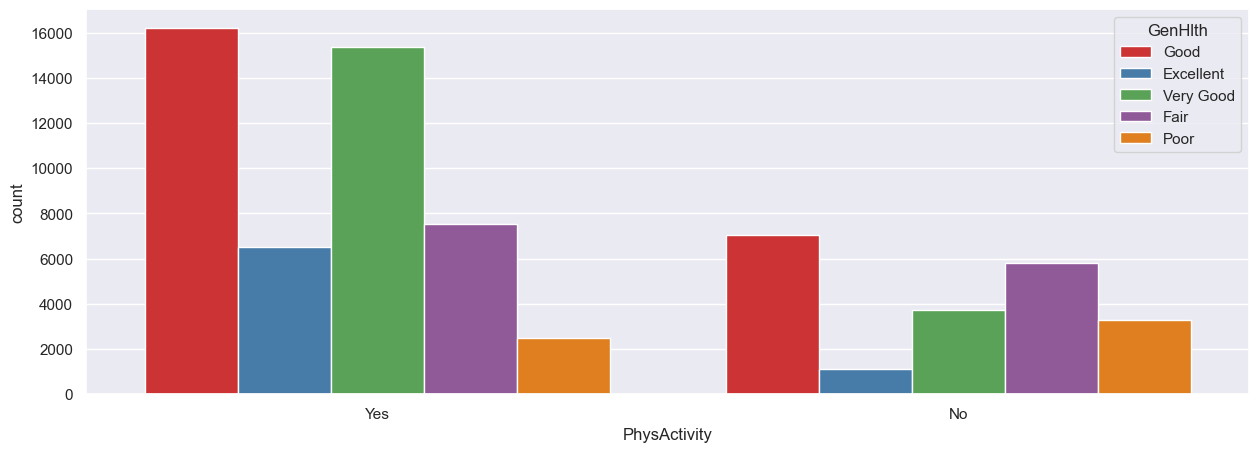

In [22]:
plt.figure(figsize= (15,5))
sns.countplot(data= df2, x='PhysActivity', palette='Set1',hue= 'GenHlth' )


1. People who do any Physical Activity tend to have a better General Health

<AxesSubplot: xlabel='Income', ylabel='Diabetes_binary'>

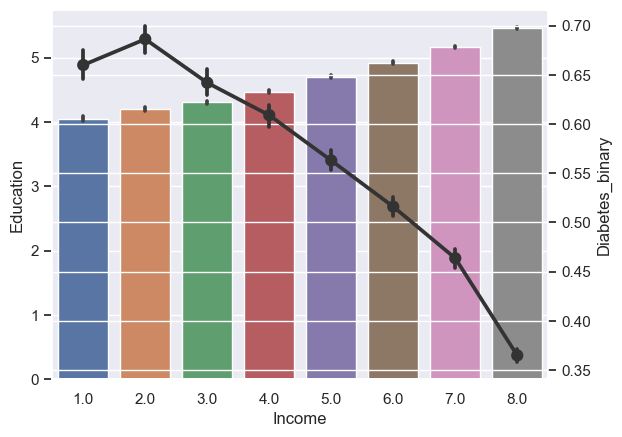

In [72]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


sns.barplot(x='Income', y='Education', data=df, ax=ax1)
sns.pointplot(x='Income',y='Diabetes_binary', color='#333', data=df, ax=ax2)

1. People with higher income tend to have a "better" education
2. People with higher income tend to not have diabetes(incidence of diabetes decreases)


# Informations gathered

1. AnyHealthCare, NoDocbcCost, Sex and Fruits are the variable less correlated to presence of DM(Diabetes Mellitus). So, the presence of any HealthCare plan; any necessity of seeing a doctor, but no money to do so; any sex and any people that ingest at least 1 fruit per day don't have the ability to infer the presence or absence of diabetes.
2. GenHlth, HighBP, BMI and HighChol are the variable more correlated to the presence of diabetes. That means, people with poorly GeneralHealth, High Blood Pressure, High Body Mass Index and High Choleterol are more likely to have diabetes.

3. Sex gender may does not interfere in presence of diabetes

4. Heavy Alcohol Consumption seems to not interfere in the presence of diabetes

5. Heavy Alcohol Consumption and Smoking habit seem to increase the presence of diabetes

6. People with many days of poor mental health (0-30) have a greater presence of diabetes than people with fewer days of poor mental health.
7. The older the people are, it seemed the better the Mental Health gets.
8. People with age between 60-74 years are more likely to have diabetes

8. People with High Blood Pressure tend to have High Cholesterol and Vice Versa. People with No High Cholesterol tend to not have High Blood Presure

9. Many people interviewed are above BMI = 25, so the BMI is above the recommended for healthy weight

10. People who do any physical activity have lower BMI levels,meanwhile people who don't do any physical activity tend to have higher levels of BMI.

11. People who have any difficulty walking tend to have highers BMI levels, meanwhile people who don't have any difficulty on walking tend to have lower lower levels of BMI.

12. People who do any Physical Activity tend to have a better General Health

1. People with higher income tend to have a "better" education
2. People with higher income tend to not have diabetes(incidence of diabetes decreases)